<a href="https://colab.research.google.com/github/garfield-gray/DataMining/blob/main/Clustering_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Theoretical

##Question 1

##Question 2

#Imperical

In [2]:
# Address of files
%cd /content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#5
!ls

/content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#5
CA5.pdf  Clustering_Methods.ipynb  data.csv


##Play with Data

###A

In [3]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CLIENT_ID                        8950 non-null   object 
 1   ACCOUNT_BALANCE                  8950 non-null   float64
 2   BALANCE_UPDATE_FREQUENCY         8950 non-null   float64
 3   TOTAL_PURCHASES                  8950 non-null   float64
 4   SINGLE_PURCHASE_AMOUNT           8950 non-null   float64
 5   INSTALLMENT_PURCHASES_AMOUNT     8950 non-null   float64
 6   ADVANCE_CASH_AMOUNT              8950 non-null   float64
 7   PURCHASES_UPDATE_FREQUENCY       8950 non-null   float64
 8   SINGLE_PURCHASE_FREQUENCY        8950 non-null   float64
 9   INSTALLMENT_PURCHASES_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY           8950 non-null   float64
 11  CASH_ADVANCE_TRANSACTIONS        8950 non-null   int64  
 12  PURCHASES_TRANSACTIO

In [4]:
df.describe()

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


###B

In [5]:
df.drop('CLIENT_ID', axis=1, inplace = True)

In [6]:

# Create an empty list to store data
data = []

# Loop to generate numbers and their squares
for i in df.columns:  # Example loop for numbers from 1 to 10
  if df[i].skew() > 1:
    data.append([i, df[i].skew(), np.sqrt(df[i]).skew(), np.log1p(df[i]).skew()])  # Append to the list
  # print(i)
# Create DataFrame from the list
dfskew = pd.DataFrame(data, columns=['Column', 'Skewness', 'sqrt', 'logp'])

print(dfskew)
dfskew['sqrt']>dfskew['logp']

                          Column   Skewness      sqrt      logp
0                ACCOUNT_BALANCE   2.393386  0.829498 -0.861021
1                TOTAL_PURCHASES   8.144269  1.730752 -0.764492
2         SINGLE_PURCHASE_AMOUNT  10.045083  2.129460  0.185854
3   INSTALLMENT_PURCHASES_AMOUNT   7.299120  1.546939 -0.024981
4            ADVANCE_CASH_AMOUNT   5.166609  1.486159  0.262594
5      SINGLE_PURCHASE_FREQUENCY   1.535613  0.724607  1.290617
6         CASH_ADVANCE_FREQUENCY   1.828686  0.706976  1.455462
7      CASH_ADVANCE_TRANSACTIONS   5.721298  1.417779  0.940131
8    PURCHASES_TRANSACTION_COUNT   4.630655  1.185757  0.032697
9                 CREDIT_MAXIMUM   1.522464  0.680964 -0.101438
10                   AMOUNT_PAID   5.907620  1.951535 -1.778312
11        MINIMUM_PAYMENT_AMOUNT  13.622797  3.795035  0.249933
12       FULL_PAYMENT_PERCENTAGE   1.942820  1.297280  1.746046


0      True
1      True
2      True
3      True
4      True
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12    False
dtype: bool

In [7]:
columns = df.select_dtypes(include=[np.number]).columns

# Apply log transformation to skewed numerical columns
skewed_columns = []
for col in columns:
    skewness = df[col].skew()
    print(col, skewness)
    if skewness > 1:  # You can adjust this threshold based on your skewness criteria
        skewed_columns.append(col)
        # df[col] = np.log1p(df[col])  # log1p is used to handle zero values

# If you want to see which columns were log-transformed
print("Skewed Columns Transformed:", skewed_columns)

ACCOUNT_BALANCE 2.393386042571806
BALANCE_UPDATE_FREQUENCY -2.0232655185149078
TOTAL_PURCHASES 8.144269064554651
SINGLE_PURCHASE_AMOUNT 10.045082884700278
INSTALLMENT_PURCHASES_AMOUNT 7.299119908745641
ADVANCE_CASH_AMOUNT 5.166609074074723
PURCHASES_UPDATE_FREQUENCY 0.06016423585803591
SINGLE_PURCHASE_FREQUENCY 1.5356127835248519
INSTALLMENT_PURCHASES_FREQUENCY 0.5092011649999882
CASH_ADVANCE_FREQUENCY 1.828686266477852
CASH_ADVANCE_TRANSACTIONS 5.721298203192298
PURCHASES_TRANSACTION_COUNT 4.630655265932403
CREDIT_MAXIMUM 1.5224640052886198
AMOUNT_PAID 5.907619794397562
MINIMUM_PAYMENT_AMOUNT 13.622796994677456
FULL_PAYMENT_PERCENTAGE 1.942819940971858
CREDIT_CARD_TENURE -2.9430172876199134
Skewed Columns Transformed: ['ACCOUNT_BALANCE', 'TOTAL_PURCHASES', 'SINGLE_PURCHASE_AMOUNT', 'INSTALLMENT_PURCHASES_AMOUNT', 'ADVANCE_CASH_AMOUNT', 'SINGLE_PURCHASE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRANSACTIONS', 'PURCHASES_TRANSACTION_COUNT', 'CREDIT_MAXIMUM', 'AMOUNT_PAID', 'MI

In [8]:

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers_list = []
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_list.append(col_outliers)
    # Concatenate all the outliers into a single DataFrame and drop duplicates
    outliers = pd.concat(outliers_list).drop_duplicates()
    return outliers

# Detect outliers in the credit card data
outliers = detect_outliers_iqr(df)
print(outliers)

      ACCOUNT_BALANCE  BALANCE_UPDATE_FREQUENCY  TOTAL_PURCHASES  \
15        6886.213231                  1.000000          1611.70   
21        6369.531318                  1.000000          6359.95   
24        5368.571219                  1.000000             0.00   
28        7152.864372                  1.000000           387.05   
30       12136.219960                  1.000000          3038.01   
...               ...                       ...              ...   
8942        40.829749                  1.000000           113.28   
8944       193.571722                  0.833333          1012.73   
8946        19.183215                  1.000000           300.00   
8947        23.398673                  0.833333           144.40   
8948        13.457564                  0.833333             0.00   

      SINGLE_PURCHASE_AMOUNT  INSTALLMENT_PURCHASES_AMOUNT  \
15                      0.00                       1611.70   
21                   5910.04                        449.91 

In [9]:
outliers

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.00,12
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.00,11
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.00,12
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6


In [10]:

# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, threshold=3):
    from scipy.stats import zscore

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = df[numeric_cols].apply(zscore)
    outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]
    return outliers

# Detect outliers in the credit card data
outliers = detect_outliers_zscore(df)
outliers

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.00,12
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.00,12
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


###C

In [11]:
#overview

df_overview = []
# columns = df . columns . drop("CLIENT_ID")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,ACCOUNT_BALANCE,float64,8871,0,0.000000,0
1,BALANCE_UPDATE_FREQUENCY,float64,43,0,0.000000,0
2,TOTAL_PURCHASES,float64,6203,0,0.000000,0
3,SINGLE_PURCHASE_AMOUNT,float64,4014,0,0.000000,0
4,INSTALLMENT_PURCHASES_AMOUNT,float64,4452,0,0.000000,0
5,ADVANCE_CASH_AMOUNT,float64,4323,0,0.000000,0
6,PURCHASES_UPDATE_FREQUENCY,float64,47,0,0.000000,0
7,SINGLE_PURCHASE_FREQUENCY,float64,47,0,0.000000,0
8,INSTALLMENT_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


###D

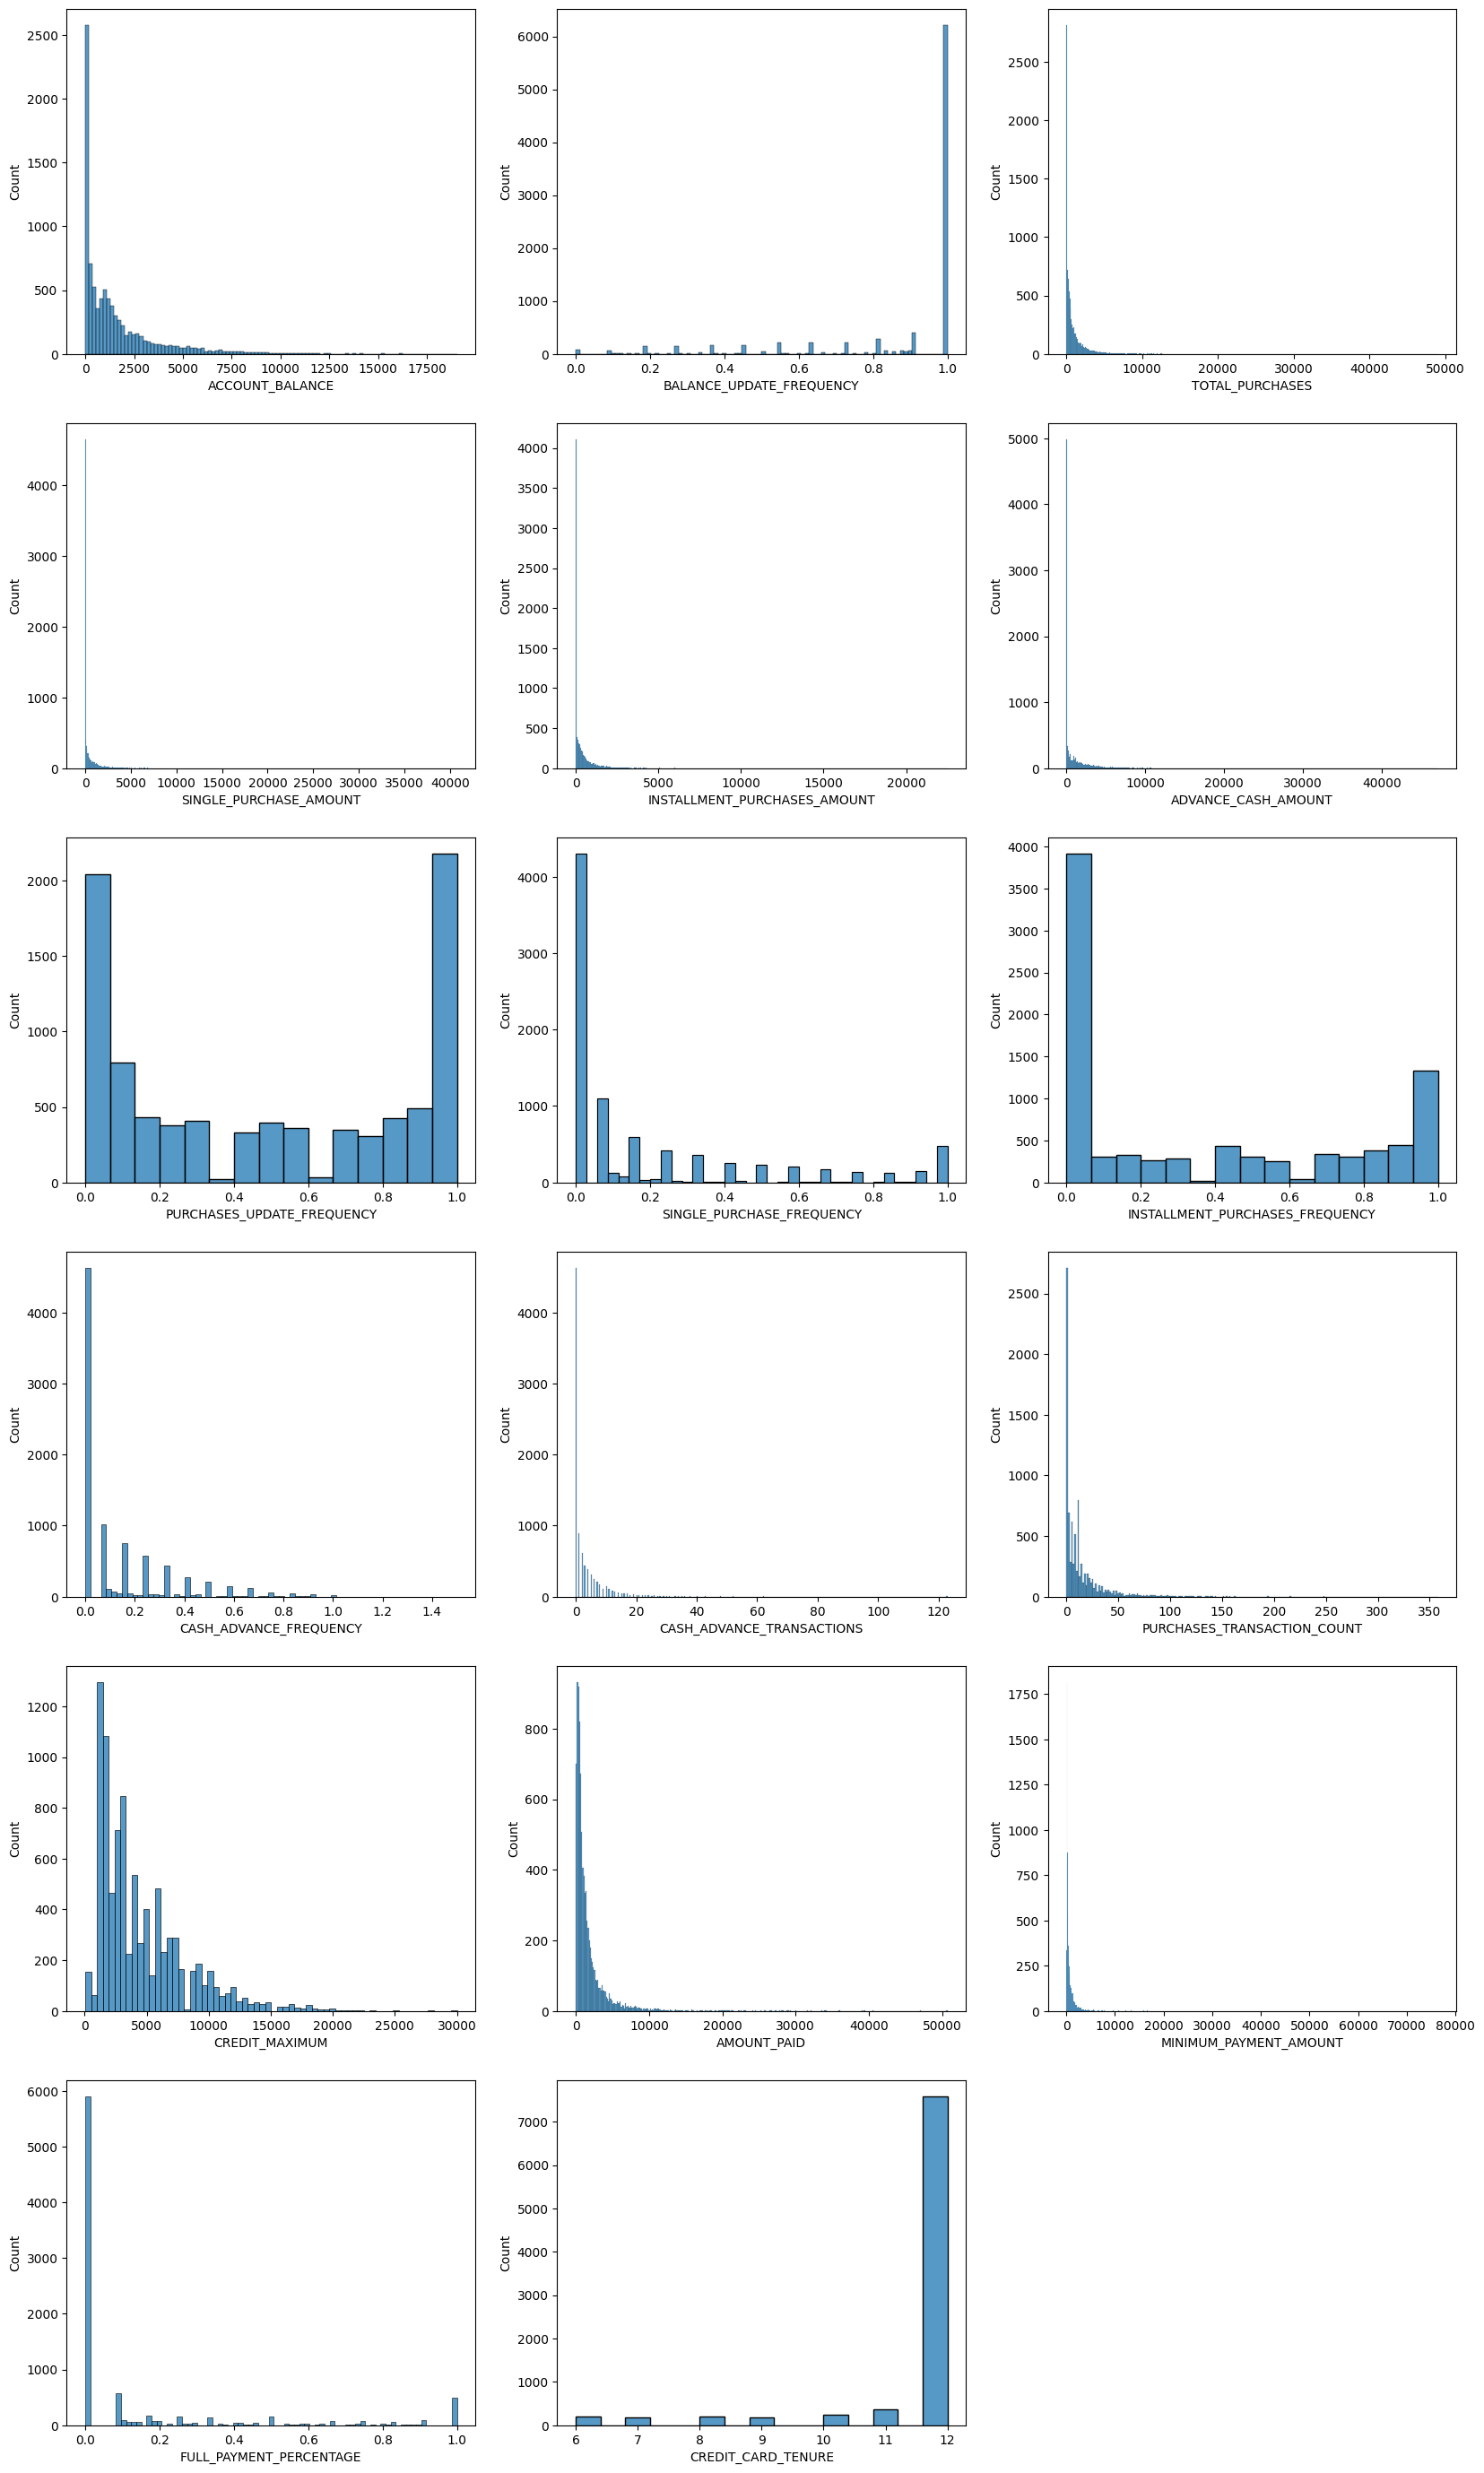

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax)
        plt.xlabel(col)

plt.show()

###E

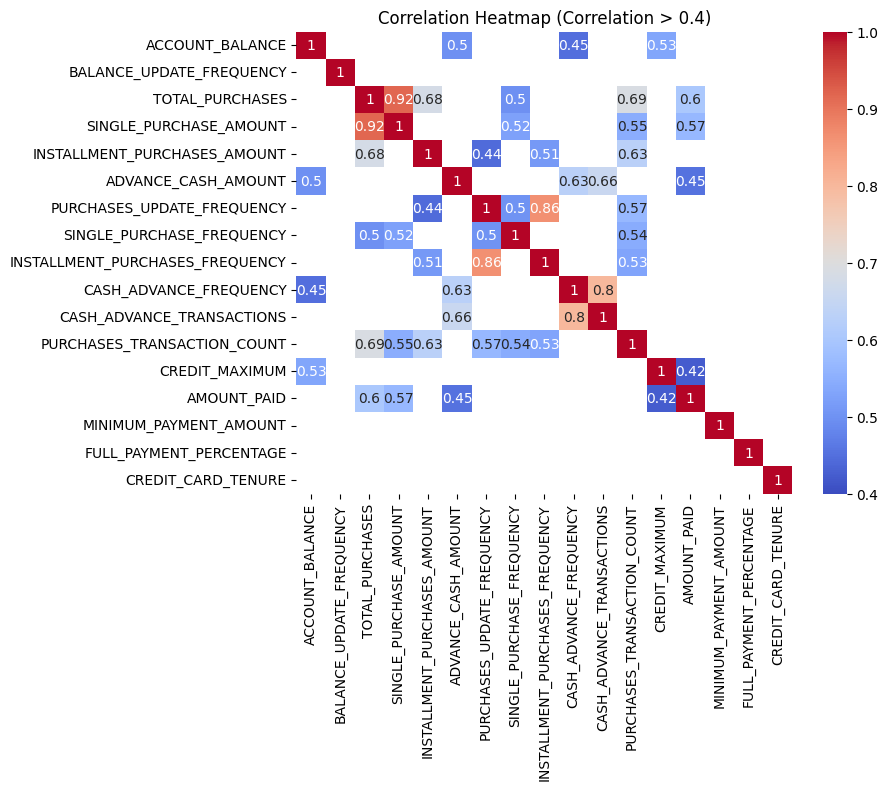

In [13]:
correlation_matrix = df.corr().abs()

# Filter correlation matrix for values greater than 0.4
high_corr_matrix = correlation_matrix[(correlation_matrix) > 0.4]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', vmin=0.4, vmax=1.0)
plt.title('Correlation Heatmap (Correlation > 0.4)')
plt.show()

##Preprpcessing

###A

In [14]:
df.dropna(inplace=True)

In [15]:
columns = df.select_dtypes(include=[np.number]).columns

# Apply log transformation to skewed numerical columns
skewed_columns = []
for col in columns:
    skewness = df[col].skew()
    # print(col, skewness)
    if skewness > 1:  # You can adjust this threshold based on your skewness criteria
        skewed_columns.append(col)
        df[col] = np.log1p(df[col])  # log1p is used to handle zero values


In [16]:

# Detect outliers in the credit card data
outliers = detect_outliers_zscore(df)


In [17]:
df = df.drop(outliers.index)

###B

In [18]:
df.isnull().sum()

ACCOUNT_BALANCE                    0
BALANCE_UPDATE_FREQUENCY           0
TOTAL_PURCHASES                    0
SINGLE_PURCHASE_AMOUNT             0
INSTALLMENT_PURCHASES_AMOUNT       0
ADVANCE_CASH_AMOUNT                0
PURCHASES_UPDATE_FREQUENCY         0
SINGLE_PURCHASE_FREQUENCY          0
INSTALLMENT_PURCHASES_FREQUENCY    0
CASH_ADVANCE_FREQUENCY             0
CASH_ADVANCE_TRANSACTIONS          0
PURCHASES_TRANSACTION_COUNT        0
CREDIT_MAXIMUM                     0
AMOUNT_PAID                        0
MINIMUM_PAYMENT_AMOUNT             0
FULL_PAYMENT_PERCENTAGE            0
CREDIT_CARD_TENURE                 0
dtype: int64

In [19]:

# Create an empty list to store data
data = []

# Loop to generate numbers and their squares
for i in df.columns:  # Example loop for numbers from 1 to 10
  if df[i].skew() > 1:
    data.append([i, df[i].skew(), np.sqrt(df[i]).skew(), np.log1p(df[i]).skew()])  # Append to the list
  # print(i)
# Create DataFrame from the list
dfskew = pd.DataFrame(data, columns=['Column', 'Skewness', 'sqrt', 'logp'])

dfskew

,Column,Skewness,sqrt,logp
0,SINGLE_PURCHASE_FREQUENCY,1.210225,0.501654,1.038385
1,CASH_ADVANCE_FREQUENCY,1.289639,0.530726,1.115417
2,FULL_PAYMENT_PERCENTAGE,1.686096,1.101640,1.544270


In [20]:
outliers2 = detect_outliers_zscore(df)
outliers2

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
16,7.636788,0.875000,0.000000,0.000000,0.000000,7.932102,0.000000,0.000000,0.000,0.223144,1.386294,0.000000,8.006701,5.973745,5.933781,0.000000,8
19,8.182831,1.000000,5.990564,0.000000,5.990564,0.000000,1.000000,0.000000,1.000,0.000000,0.000000,2.564949,8.294300,6.961278,9.430804,0.000000,12
36,8.913022,1.000000,0.000000,0.000000,0.000000,9.090923,0.000000,0.000000,0.000,0.546544,2.484907,0.000000,9.105091,7.400841,7.594806,0.000000,11
46,6.164256,0.500000,4.707185,0.000000,4.707185,6.922308,0.375000,0.000000,0.250,0.117783,0.693147,1.386294,7.438972,5.176223,4.998561,0.000000,8
53,6.143486,0.888889,7.590963,7.590963,0.000000,7.591996,0.666667,0.510826,0.000,0.105360,0.693147,2.484907,8.006701,8.042716,4.893698,0.182322,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,4.806432,0.750000,5.956511,5.956511,0.000000,5.139057,0.500000,0.405465,0.000,0.117783,1.386294,2.079442,6.216606,4.597393,4.744450,0.000000,8
8877,4.027986,0.875000,5.101755,0.000000,5.101755,0.000000,0.875000,0.000000,0.750,0.000000,0.000000,2.079442,6.908755,4.152912,4.705744,0.000000,8
8878,6.768870,0.750000,0.000000,0.000000,0.000000,7.051791,0.000000,0.000000,0.000,0.117783,1.386294,0.000000,7.090910,5.022268,5.825962,0.000000,8
8879,4.932637,1.000000,6.091310,0.000000,6.091310,0.000000,0.750000,0.000000,0.625,0.000000,0.000000,1.945910,6.908755,5.137266,4.833420,0.000000,8


In [21]:
df = df.drop(outliers2.index)

In [22]:
detect_outliers_zscore(df)

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
17,3.739798,0.454545,6.253829,0.000000,6.253829,0.000000,0.416667,0.000000,0.333333,0.000000,0.000000,2.197225,7.824446,5.543577,4.306808,0.223144,12
39,7.253189,0.454545,6.871340,6.871340,0.000000,8.728213,0.083333,0.080042,0.000000,0.287682,1.945910,1.945910,8.922792,9.907085,6.580568,0.287682,12
73,7.501067,1.000000,6.572143,6.222735,5.355737,0.000000,0.500000,0.095310,0.400000,0.000000,0.000000,2.197225,7.719130,6.791241,6.435762,0.000000,10
90,9.146575,1.000000,8.537206,7.046499,8.282291,5.918187,1.000000,0.223144,0.916667,0.080042,0.693147,3.850148,9.105091,8.765692,9.192995,0.000000,12
107,8.514670,1.000000,0.000000,0.000000,0.000000,8.601620,0.000000,0.000000,0.000000,0.459532,3.713572,0.000000,8.987322,7.124911,7.272559,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8808,5.957036,0.900000,6.059357,3.931826,5.935159,6.697757,0.900000,0.095310,0.800000,0.405465,1.945910,3.258097,6.908755,5.841005,5.814891,0.000000,10
8809,1.905307,0.900000,4.435923,0.000000,4.435923,0.000000,0.900000,0.000000,0.800000,0.000000,0.000000,2.302585,7.313887,4.376511,4.528625,0.318454,10
8810,3.376829,1.000000,5.980909,3.824284,5.860786,0.000000,1.000000,0.095310,0.900000,0.000000,0.000000,2.484907,6.908755,5.864387,4.979278,0.693147,10
8812,2.256503,0.400000,0.000000,0.000000,0.000000,4.048990,0.000000,0.000000,0.000000,0.095310,0.693147,0.000000,7.090910,5.011531,4.275794,0.405465,10


In [23]:
df.describe()

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
count,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000
mean,6.467036,0.940267,5.082193,3.412154,3.544729,3.236422,0.523455,0.174319,0.391074,0.103490,0.780427,2.026321,8.138106,6.908869,6.013630,0.119624,11.901749
std,1.678993,0.135540,2.911696,3.271139,3.105242,3.511940,0.400696,0.225232,0.403439,0.138204,0.954625,1.387142,0.807019,1.047180,1.030713,0.210456,0.378419
min,1.054115,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.707110,3.616450,2.882220,0.000000,10.000000
25%,5.373888,1.000000,4.110874,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.693147,7.496097,6.183236,5.189656,0.000000,12.000000
50%,6.913675,1.000000,6.093637,4.214938,4.839847,0.000000,0.545455,0.080042,0.250000,0.000000,0.000000,2.302585,8.160804,6.901304,5.864286,0.000000,12.000000
75%,7.684770,1.000000,7.157525,6.520621,6.295303,6.898477,1.000000,0.287682,0.833333,0.154151,1.609438,3.044522,8.779711,7.613279,6.752692,0.154151,12.000000
max,9.825340,1.000000,10.351385,10.131570,10.021315,10.048964,1.000000,0.693147,1.000000,0.530628,3.713572,5.736572,10.308986,10.107663,9.192995,0.693147,12.000000


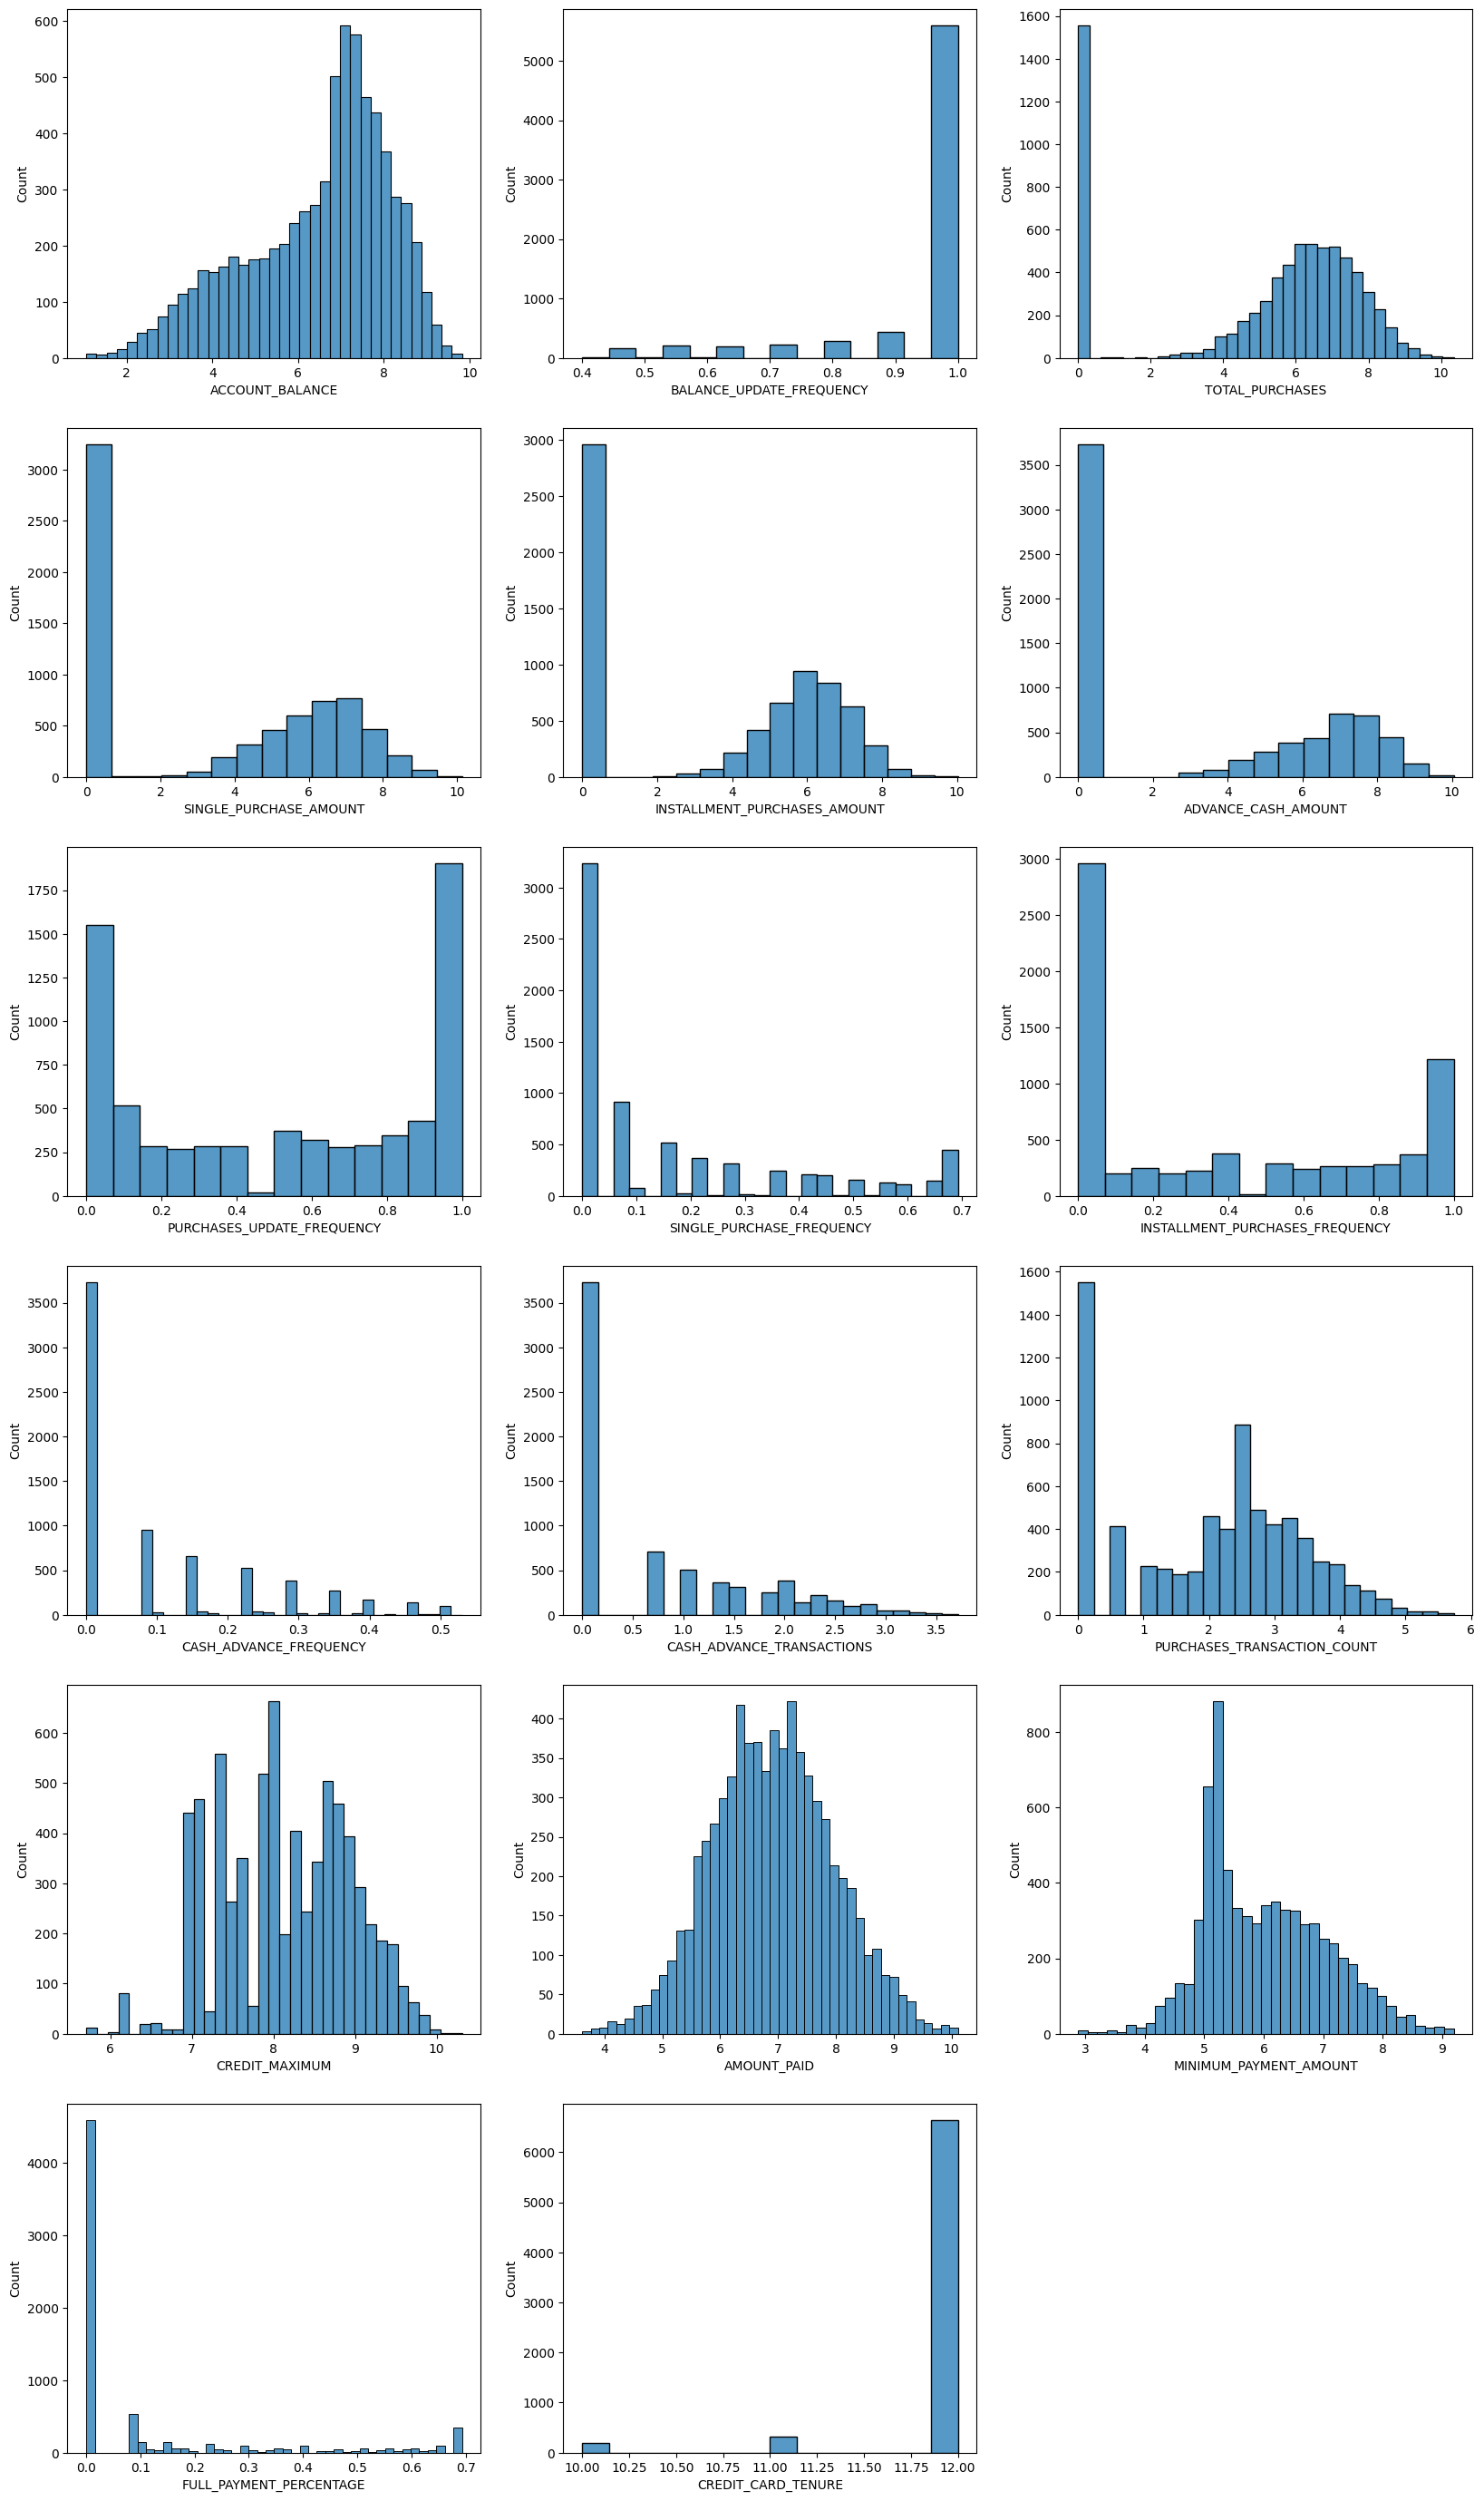

In [24]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax)
        plt.xlabel(col)

plt.show()

##Clustering

###A

In [26]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

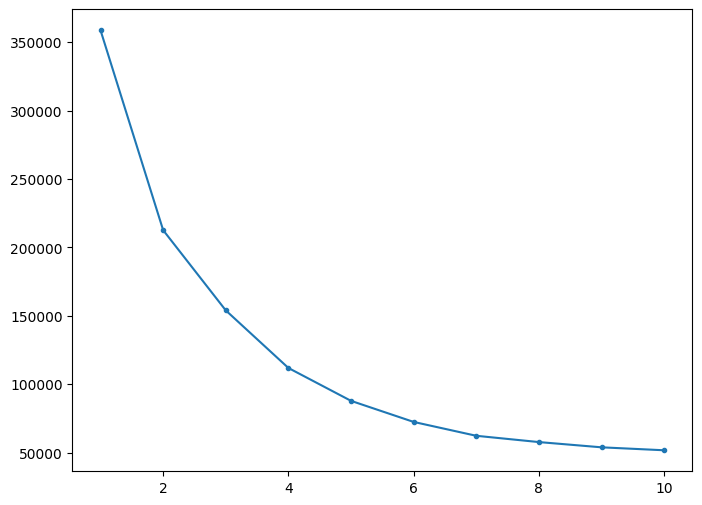

In [30]:
kValues = range(1, 11)
inertiaValues = []

for k in kValues:
  kmeans = KMeans(n_clusters = k, random_state=42)
  kmeans.fit(df)
  inertiaValues.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(kValues, inertiaValues, marker= '.')
plt.show()

In [ ]:
# it's 3

###B

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(df)


###C

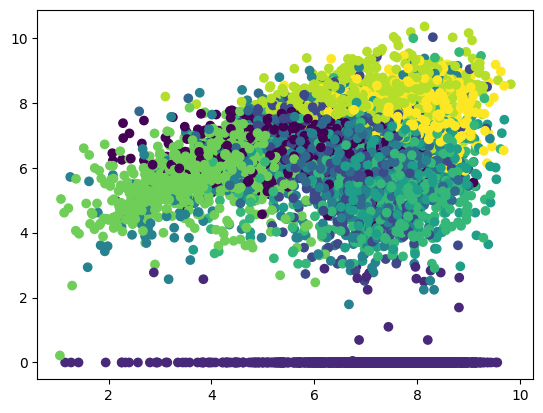

In [33]:
plt.scatter(df['ACCOUNT_BALANCE'], df['TOTAL_PURCHASES'], c=kmeans.labels_)
plt.show()

###D

###E